<h2><b>
 Namų darbas nr. 2
</b></h2>

**Ignas Tamošiūnas DGTfm-23**

**Užduotys**

1.  Duomenų įsikėlimas.
2.	Kintamųjų aprašymas: aprašykite duomenų rinkinio kintamuosius – kokia jų prasmė, koks kintamųjų tipas. 
3.	Aprašomoji statistika: apskaičiuokite pagrindines skaitines charakteristikas, nubrėžkite atitinkamas diagramas vaizduojančias kintamųjų pasiskirstymą.
4.	Hierarchinis klasterizavimas: Taikydami 5 hierarchinio klasterizavimo jungimo metodus tyrimo objektus sugrupuokite į tris grupes. Kiekvienu atveju nubraižykite dendrogramą ir ant jos pažymėkite gautas grupes. Atstumo matą galima pasirinkti laisvai.
5.	Nehierarchinis klasterizavimas. Taikydami k-vidurkių metodą, objektus sugrupuokite į k=2,3,4 klasterius. 
6.	Klasterių įvertinimas: Apskaičiuokite Dunn indeksą pasirinkto klasterizavimo atveju (vienu iš hierarchinių arba k-vidurkių metodais) klasterių skaičiui nuo 2 iki 10 ir gautus rezultatus pavaizduokite diagramoje. Pateikite išvadą, kuris klasterių skaičius tinkamiausias pagal Dunn indeksą.
7.	Tyrimo hipotezė: patikrinkite ar pasirinkto kintamojo reikšmės skirtinguose klasteriuose skiriasi, tikrindami tinkamą hipotezę.
8.	Išvados: Kiekvienoje dalyje pateikite apibendrinimą ir išvadas. 


### 1. Duomenų įsikėlimas


In [159]:
import pandas as pd

df = pd.read_table("bike-sharing.csv", sep=",", header=0)
# df = df[df['workingday'] >= 1]
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 2. Kintamųjų aprašymas


Kintamasis 'dteday' yra kategorinis, o likusieji yra kiekybiniai.

**Kintamųjų prasmė:**

1. **instant** : eilutės numeris
2. **dteday** : data
3. **season** : (sezonai, kur 1 - žiema, 2 - pavasaris, 3 - vasara, 4 - ruduo)
4. **yr** : metų žymėjimas
5. **mnth** : mėnesio žymėjimas
6. **hr** : valandos
7. **holiday** : šventinės dienos
8. **weekday** : savaitės diena
9. **workingday** : jei diena nėra savaitgalis ar šventė, vertė yra 1, kitu atveju 0.
10. **weathersit** :
    - 1: Giedra, Truputis debesų, Dalinai debesuota, Dalinai debesuota
    - 2: Rūkas + Debesuota, Rūkas + Prakirsti debesys, Rūkas + Truputis debesų, Rūkas
    - 3: Lengvas sniegas, Lengvas lietus + Perkūnija + Sklaidyti debesys, Lengvas lietus + Sklaidyti debesys
    - 4: Stiprus lietus + Ledo kruša + Perkūnija + Rūkas, Sniegas + Rūkas
11. **temp** : Normalizuota temperatūra Celsijaus skalėje. Vertės gautos iš (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (tik valandinėje skalėje)
12. **atemp** : Normalizuota jutimo temperatūra Celsijaus skalėje. Vertės gautos iš (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (tik valandinėje skalėje)
13. **hum** : Normalizuota drėgmė. Vertės dalinamos iš 100 (maks.)
14. **windspeed** : Normalizuotas vėjo greitis. Vertės dalinamos iš 67 (maks.)
15. **casual** : atsitiktinių vartotojų skaičius
16. **registered** : registruotų vartotojų skaičius
17. **cnt** : bendras išnuomotų dviračių skaičius, įskaitant ir atsitiktinius, ir registruotus



In [161]:
type(df.values) # išvedama reikšmių matrica.
df.columns # išvedamas stulpelių pavadinimų sąrašas
df.describe() # Aprašomoji statistika.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Pašaliname stulpelius, kurių nenaudosime:**

In [162]:
df1 = df.drop(['dteday'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


### 3. Aprašomoji statistika.



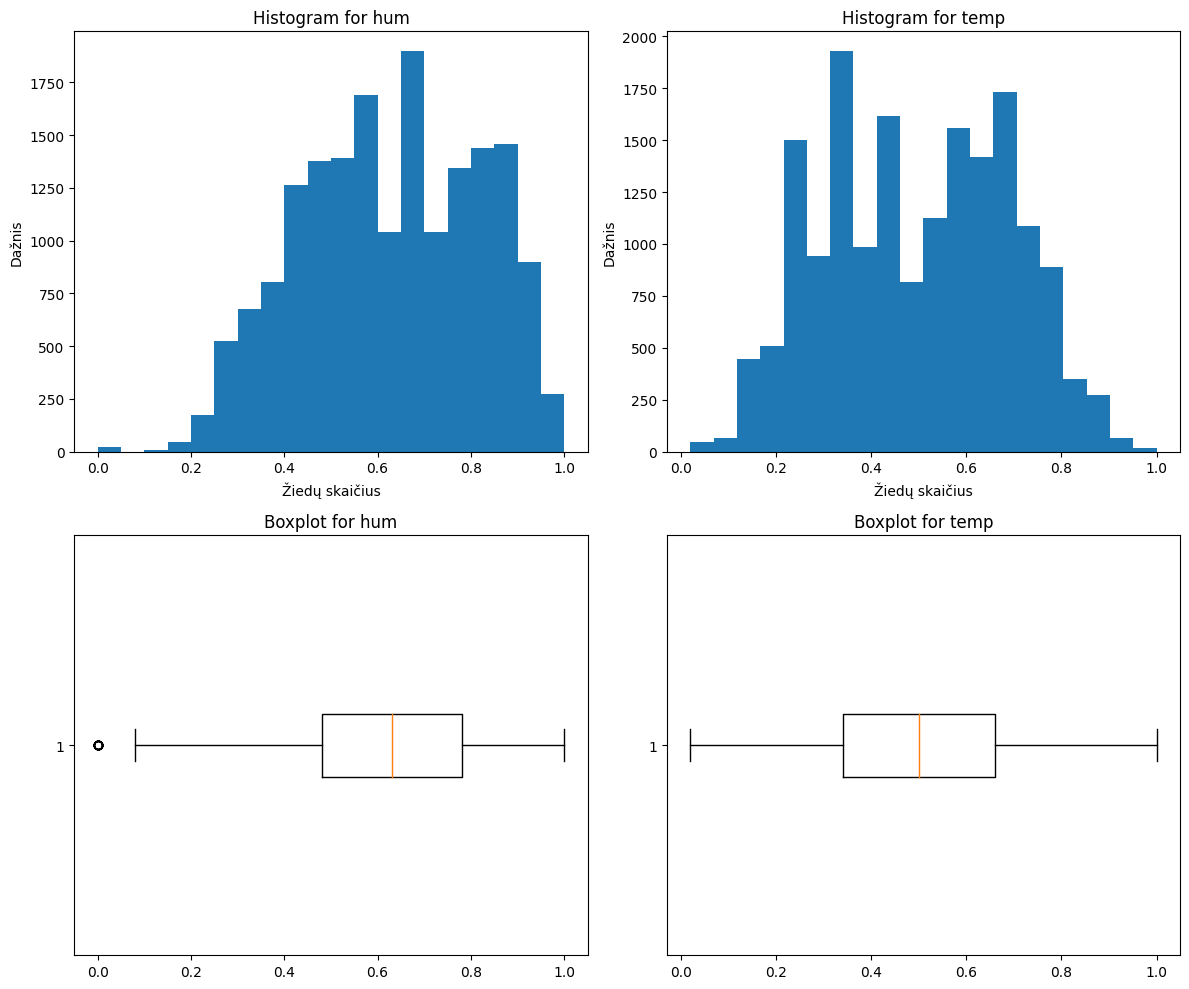

In [163]:
import matplotlib.pyplot as plt

df1 = df['temp']
df2 = df['hum']

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df2, bins=20)
plt.title('Histogram for hum')
plt.xlabel('Žiedų skaičius')
plt.ylabel('Dažnis')

plt.subplot(2, 2, 2)
plt.hist(df1, bins=20)
plt.title('Histogram for temp')
plt.xlabel('Žiedų skaičius')
plt.ylabel('Dažnis')

plt.subplot(2, 2, 3)
plt.boxplot(df2, vert=False)
plt.title('Boxplot for hum')

plt.subplot(2, 2, 4)
plt.boxplot(df1, vert=False)
plt.title('Boxplot for temp')

plt.tight_layout()
plt.show()


**Išvados:**

- Drėgmės histogramos vertės pasiskirsčiusios link vidurkio, su didžiausia tankme aplink 0.6-0.8. Drėgmės pasiskirstymas ištemptas į dešinę, kur yra vertės artėja prie 1.
- Temperatūros histogramos pasiskirstymas atrodo truputį mažiau simetriškas nei drėgmės, su dažniausiomis reikšmėmis 0.2-0.4 ir 0.6-0.8. Taip pat matoma, kad temperatūra turi platų pasiskirstymą, bet su aiškiais pikais.
- Drėgmės(boxplot) grafike matome, kad yra nuokryptis (beveik 0.1). Šioje vietoje drėgmė buvo žymiai mažesnė lyginant su duomenų rinkiniu.
- Temperatūros (boxplot) grafike nesimato jokių nukrypimų, o tai rodo vienodesnį duomenų rinkinį (temperatūros atžvilgiu).

### 4. Hierarchinis klasterizavimas.
**4.1 užduotis.** Atlikti objektų klasterizavimą **single_linkage"** metodu.

In [164]:
from sklearn.preprocessing import StandardScaler
import numpy as np


dfss = df.drop(['dteday'], axis=1)
np.random.seed(20194281)
df1 = dfss.sample(n=30, random_state=10)
dfs = df1.select_dtypes(include=['float64','int64'])

data_scaler = StandardScaler()
dfs_transformed = data_scaler.fit_transform(dfs)

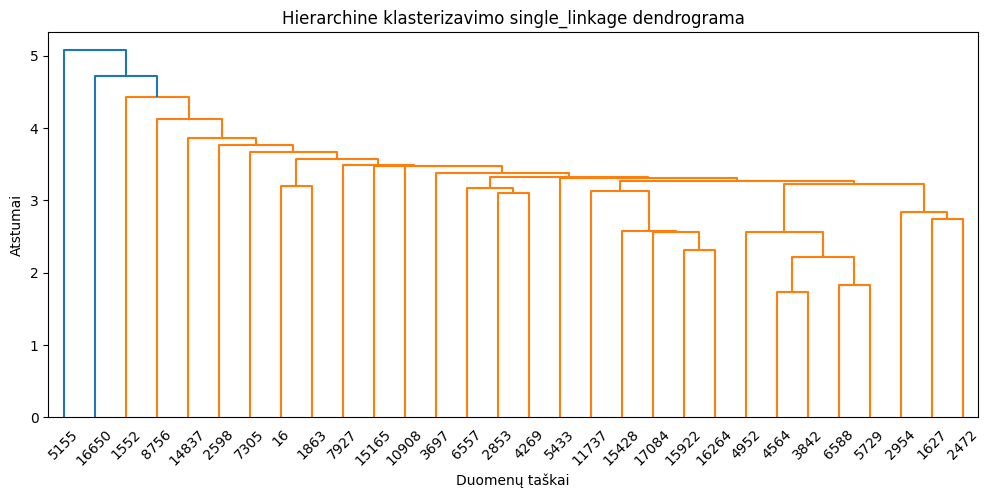

In [165]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 5))
single_clustering = linkage(dfs_transformed, method="single", metric="euclidean")

D = dendrogram(single_clustering, labels=dfs.index, color_threshold=4.5)

plt.xlabel('Duomenų taškai')
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo single_linkage dendrograma')

plt.show()

Dendograma turi 3 klasterius.

- Pirmajame klasteryje išskirtas 1 (5115 taškas) elementas. Šis klasteris išskirtas iš kitų, nes šiame elemente yra ypatingai aukšta temperatūra vasaros sezono metu ir turi didelį dviračių nuomos skaičiaus.
- Antrame klasteryje išskirtas 1 (16650 taškas) elementas. Šis klasteris išskirtas iš kitų, nes šiame elemente yra didelis išnuomotų dviračių skaičius.
- Trečiame klasteryje (geltoni stulpeliai) išskirti 28 elementai. Šiame klasteryje išnuomotų dviračių skaičius yra mažesnis lyginant su pirmuoju klasteriu ir antruoju.

**4.2 užduotis.** Atlikti objektų klasterizavimą **complete_linkage"** metodu.

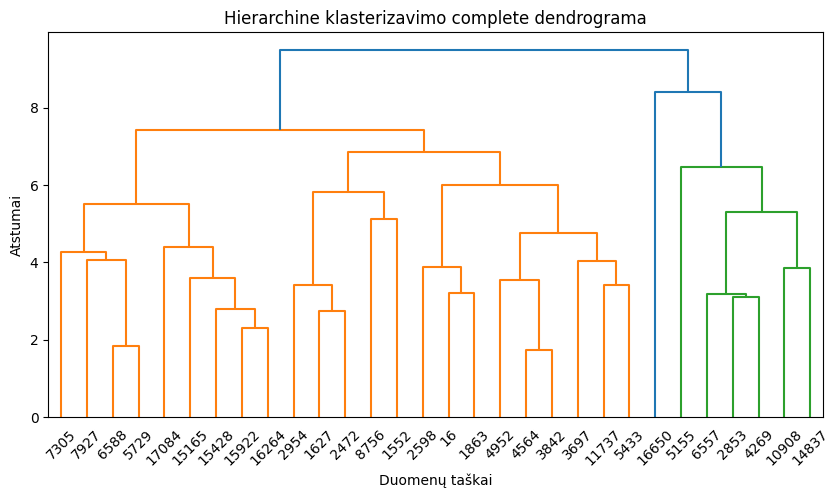

In [166]:

complete_clustering = linkage(dfs_transformed, method="complete", metric="euclidean")

plt.figure(figsize=(10, 5))
D = dendrogram(complete_clustering, labels=dfs.index, color_threshold=8)
plt.xlabel('Duomenų taškai')
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo complete dendrograma')
plt.show()


Dendograma turi 3 klasterius.

- Pirmame klasteryje išskirtas 1 (16650 taškas) elementas. Šis klasteris išskirtas iš kitų, nes šiame elemente yra pats didžiausias išnuomotų dviračių skaičius.
- Antrame klasteryje (žalias) elementas. Šis klasteris išskirtas iš kitų, nes jis turi didžiausius bendrų išnuomotų dviračių skaičius, įskaitant ir atsitiktinius, ir registruotus vartotojus.
- Trečiame klasteryje (geltonas) elementas. Šis klasteris išskirtas iš kitų, nes jis turi mažiausią bendrų išnuomotų dviračių skaičius, įskaitant ir atsitiktinius, ir registruotus vartotojus.

**4.3 užduotis.** Atlikti objektų klasterizavimą **average_linkage"** metodu.

Text(0.5, 1.0, 'Hierarchine klasterizavimo average dendrograma')

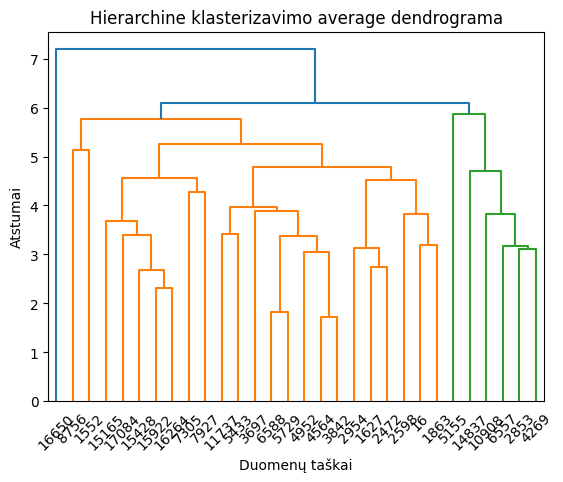

In [167]:
average_clustering = linkage(dfs_transformed, method="average", metric="euclidean")

D = dendrogram(average_clustering, labels=dfs.index, color_threshold=6)

plt.xlabel('Duomenų taškai')
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo average dendrograma')

Dendograma turi 3 klasterius. Šios dendogramos rezultatai yra panašus į complete dendogramą.

- Pirmame klasteryje išskirtas 1 (16650 taškas) elementas. Šis klasteris išskirtas iš kitų, nes šiame elemente yra pats didžiausias išnuomotų dviračių skaičius.
- Antrame klasteryje (žalias) elementas. Šis klasteris išskirtas iš kitų, nes jis turi didžiausius bendrų išnuomotų dviračių skaičius, įskaitant ir atsitiktinius, ir registruotus vartotojus.
- Trečiame klasteryje (geltonas) elementas. Šis klasteris išskirtas iš kitų, nes jis turi mažiausią bendrų išnuomotų dviračių skaičius, įskaitant ir atsitiktinius, ir registruotus vartotojus.

**4.4 užduotis.** Atlikti objektų klasterizavimą **Ward's_linkage"** metodu.

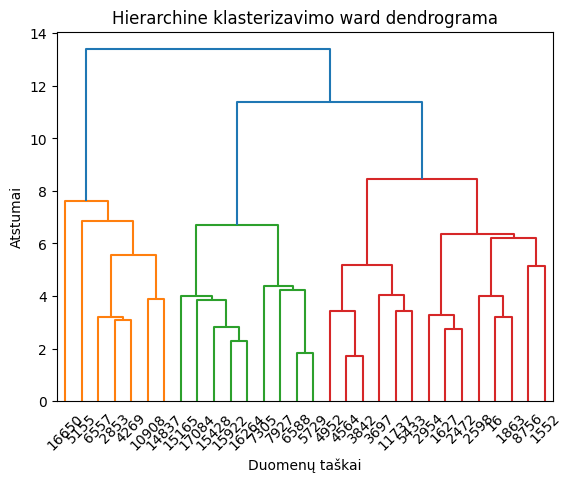

In [168]:
ward_clustering = linkage(dfs_transformed, method="ward", metric="euclidean")

D = dendrogram(ward_clustering, labels=dfs.index, color_threshold=9)

plt.xlabel('Duomenų taškai')
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo ward dendrograma')

plt.show()

Dendograma turi 3 klasterius. Šios dendogramos rezultatai yra panašus į complete dendogramą.

- Pirmame klasteryje (geltonas) elementas. Šis klasteris išskirtas iš kitų, nes jis turi didžiausią išnuomotų dviračių skaičių ir didžiausią užsiregistravusių vartotojų skaičių.
- Antrame klasteryje (žalias) elementas. Šis klasteris išskirtas iš kitų, nes jis užima antrąją vietą pagal išnuomotų dviračių skaičių ir užsiregistravusių vartotojų skaičių.
- Antrame klasteryje (raudonas) elementas. Šis klasteris išskirtas iš kitų, nes jis užima paskutinę vietą pagal išnuomotų dviračių skaičių ir užsiregistravusių vartotojų skaičių.

**4.5 užduotis.** Atlikti objektų klasterizavimą **centroid** metodu.

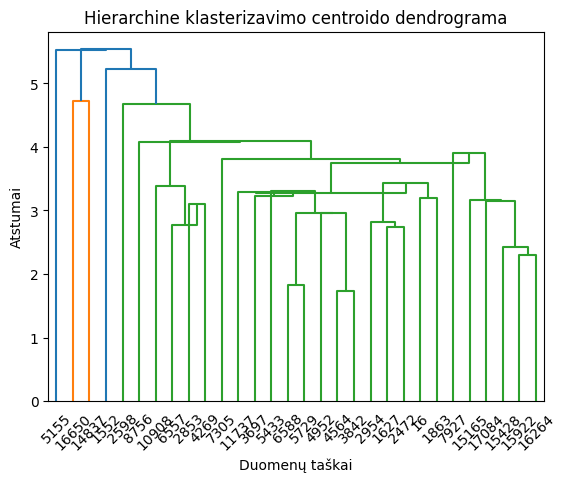

In [169]:
centroid = linkage(dfs_transformed, method="centroid", metric="euclidean")

D = dendrogram(centroid, labels=dfs.index, color_threshold=4.9)

plt.xlabel('Duomenų taškai')
plt.ylabel('Atstumai')
plt.title('Hierarchine klasterizavimo centroido dendrograma')

plt.show()

- Pirmame klasteryje išskirtas 1 (5155 taškas) elementas. Šis klasteris išskirtas iš kitų, nes šiame elemente yra pati didžiausia temperatūra.
- Antrame klasteryje išskirti 2 (16650 ir 14837 taškas) elementai. Šis klasteris išskirtas iš kitų, nes turi daugiausiai atsitiktinių vartotojų skaičius
- Trečiame klasteryje išskirtas (žalias) elementas. Šis klasteris iškirtas, nes turi daugiausiai panašių duomenų lyginant visus duomenis.

### 5.  Nehierarchinis klasterizavimas



In [170]:
# Klasterizuodami K-Means metodu naudosime didesnę imtį, n = 100.
np.random.seed(20194281)
dfs = dfss.sample(100, random_state=10)
dfs3 = dfs.select_dtypes(include=["float64", "int64"])
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 6557 to 13067
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     100 non-null    int64  
 1   season      100 non-null    int64  
 2   yr          100 non-null    int64  
 3   mnth        100 non-null    int64  
 4   hr          100 non-null    int64  
 5   holiday     100 non-null    int64  
 6   weekday     100 non-null    int64  
 7   workingday  100 non-null    int64  
 8   weathersit  100 non-null    int64  
 9   temp        100 non-null    float64
 10  atemp       100 non-null    float64
 11  hum         100 non-null    float64
 12  windspeed   100 non-null    float64
 13  casual      100 non-null    int64  
 14  registered  100 non-null    int64  
 15  cnt         100 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 13.3 KB


In [171]:

dfs3

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6557,6558,4,0,10,19,0,3,1,1,0.58,0.5455,0.56,0.1343,40,334,374
11737,11738,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126
4952,4953,3,0,7,6,0,6,0,1,0.72,0.6818,0.70,0.2985,6,18,24
2853,2854,2,0,5,19,0,2,1,1,0.68,0.6364,0.57,0.3582,42,323,365
3697,3698,2,0,6,23,0,2,1,1,0.68,0.6364,0.79,0.1045,18,72,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,7251,4,0,11,17,0,4,1,1,0.48,0.4697,0.55,0.0896,33,465,498
5029,5030,3,0,8,11,0,2,1,1,0.84,0.7273,0.32,0.4179,32,96,128
11819,11820,2,1,5,16,0,6,0,2,0.70,0.6364,0.21,0.1940,254,337,591
7431,7432,4,0,11,6,1,5,0,1,0.28,0.2576,0.45,0.3284,0,46,46


In [172]:
from sklearn.cluster import KMeans

dfs_k2 = dfs3

kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10)
kmeans.fit(dfs_k2)
dfs_k2['clus_membership']=kmeans.labels_

dfs_k2

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
6557,6558,4,0,10,19,0,3,1,1,0.58,0.5455,0.56,0.1343,40,334,374,0
11737,11738,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126,1
4952,4953,3,0,7,6,0,6,0,1,0.72,0.6818,0.70,0.2985,6,18,24,0
2853,2854,2,0,5,19,0,2,1,1,0.68,0.6364,0.57,0.3582,42,323,365,0
3697,3698,2,0,6,23,0,2,1,1,0.68,0.6364,0.79,0.1045,18,72,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,7251,4,0,11,17,0,4,1,1,0.48,0.4697,0.55,0.0896,33,465,498,0
5029,5030,3,0,8,11,0,2,1,1,0.84,0.7273,0.32,0.4179,32,96,128,0
11819,11820,2,1,5,16,0,6,0,2,0.70,0.6364,0.21,0.1940,254,337,591,1
7431,7432,4,0,11,6,1,5,0,1,0.28,0.2576,0.45,0.3284,0,46,46,0


c:\Users\37062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


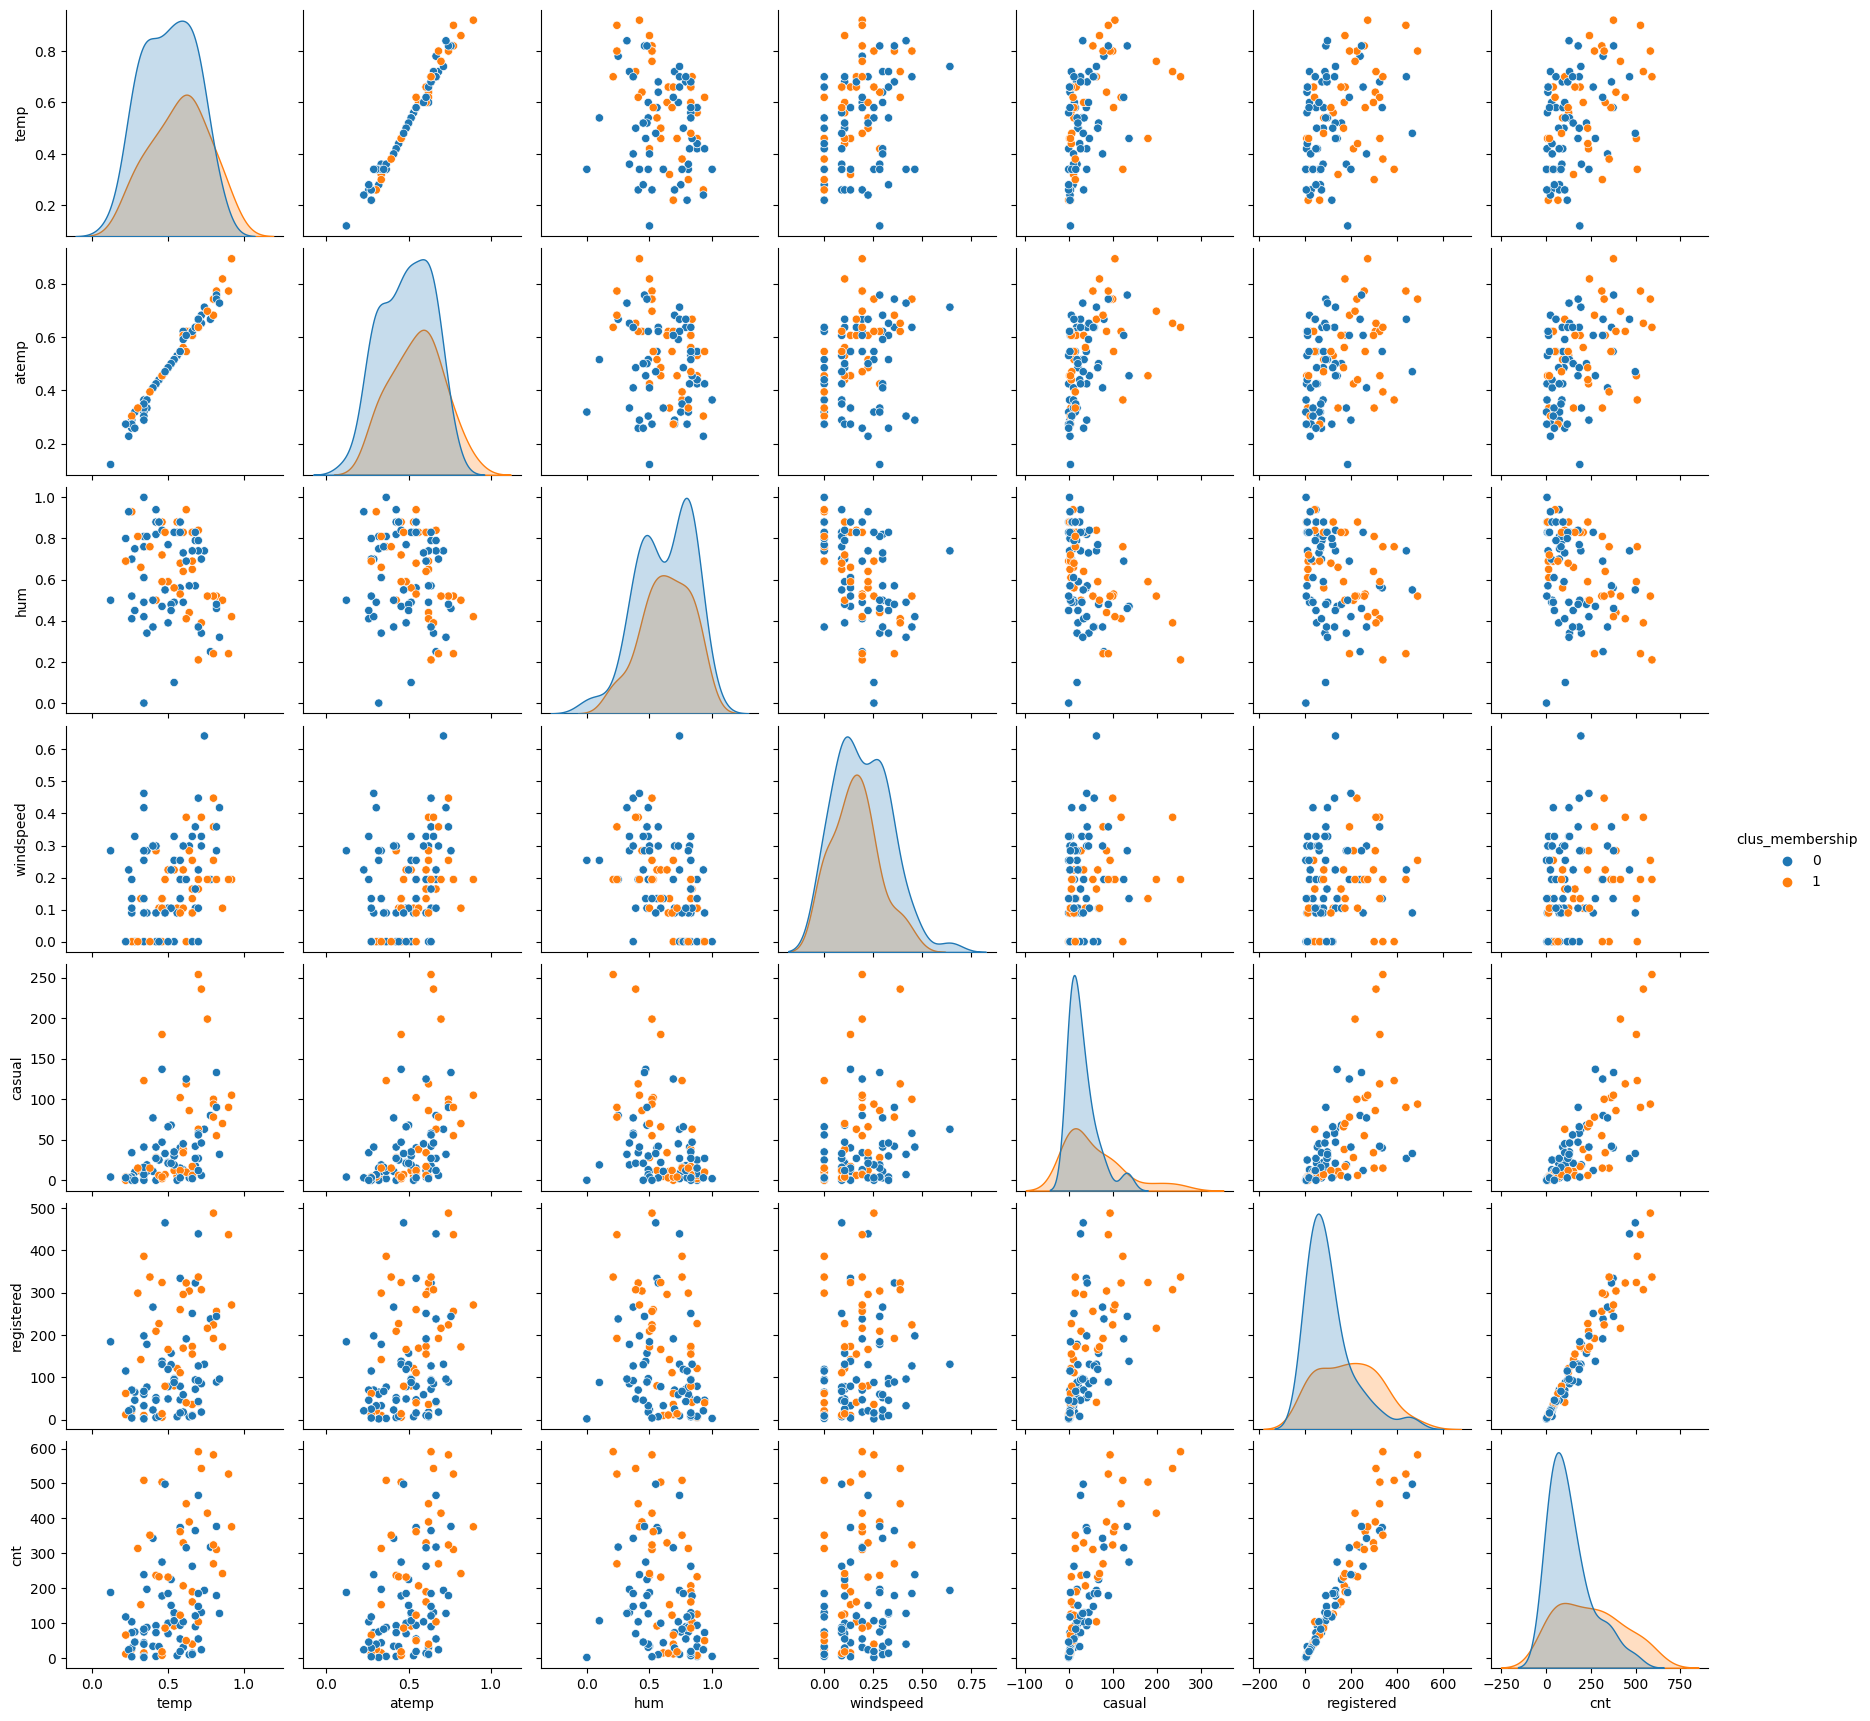

In [173]:
import seaborn as sns
g = sns.pairplot(dfs_k2, hue="clus_membership", diag_kind="kde", vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
g

In [174]:
from sklearn.cluster import KMeans

dfs_k3 = dfs3

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10)
kmeans.fit(dfs_k3)
dfs_k3['clus_membership']=kmeans.labels_

dfs_k3

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
6557,6558,4,0,10,19,0,3,1,1,0.58,0.5455,0.56,0.1343,40,334,374,2
11737,11738,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126,1
4952,4953,3,0,7,6,0,6,0,1,0.72,0.6818,0.70,0.2985,6,18,24,0
2853,2854,2,0,5,19,0,2,1,1,0.68,0.6364,0.57,0.3582,42,323,365,0
3697,3698,2,0,6,23,0,2,1,1,0.68,0.6364,0.79,0.1045,18,72,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,7251,4,0,11,17,0,4,1,1,0.48,0.4697,0.55,0.0896,33,465,498,2
5029,5030,3,0,8,11,0,2,1,1,0.84,0.7273,0.32,0.4179,32,96,128,0
11819,11820,2,1,5,16,0,6,0,2,0.70,0.6364,0.21,0.1940,254,337,591,1
7431,7432,4,0,11,6,1,5,0,1,0.28,0.2576,0.45,0.3284,0,46,46,2


c:\Users\37062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


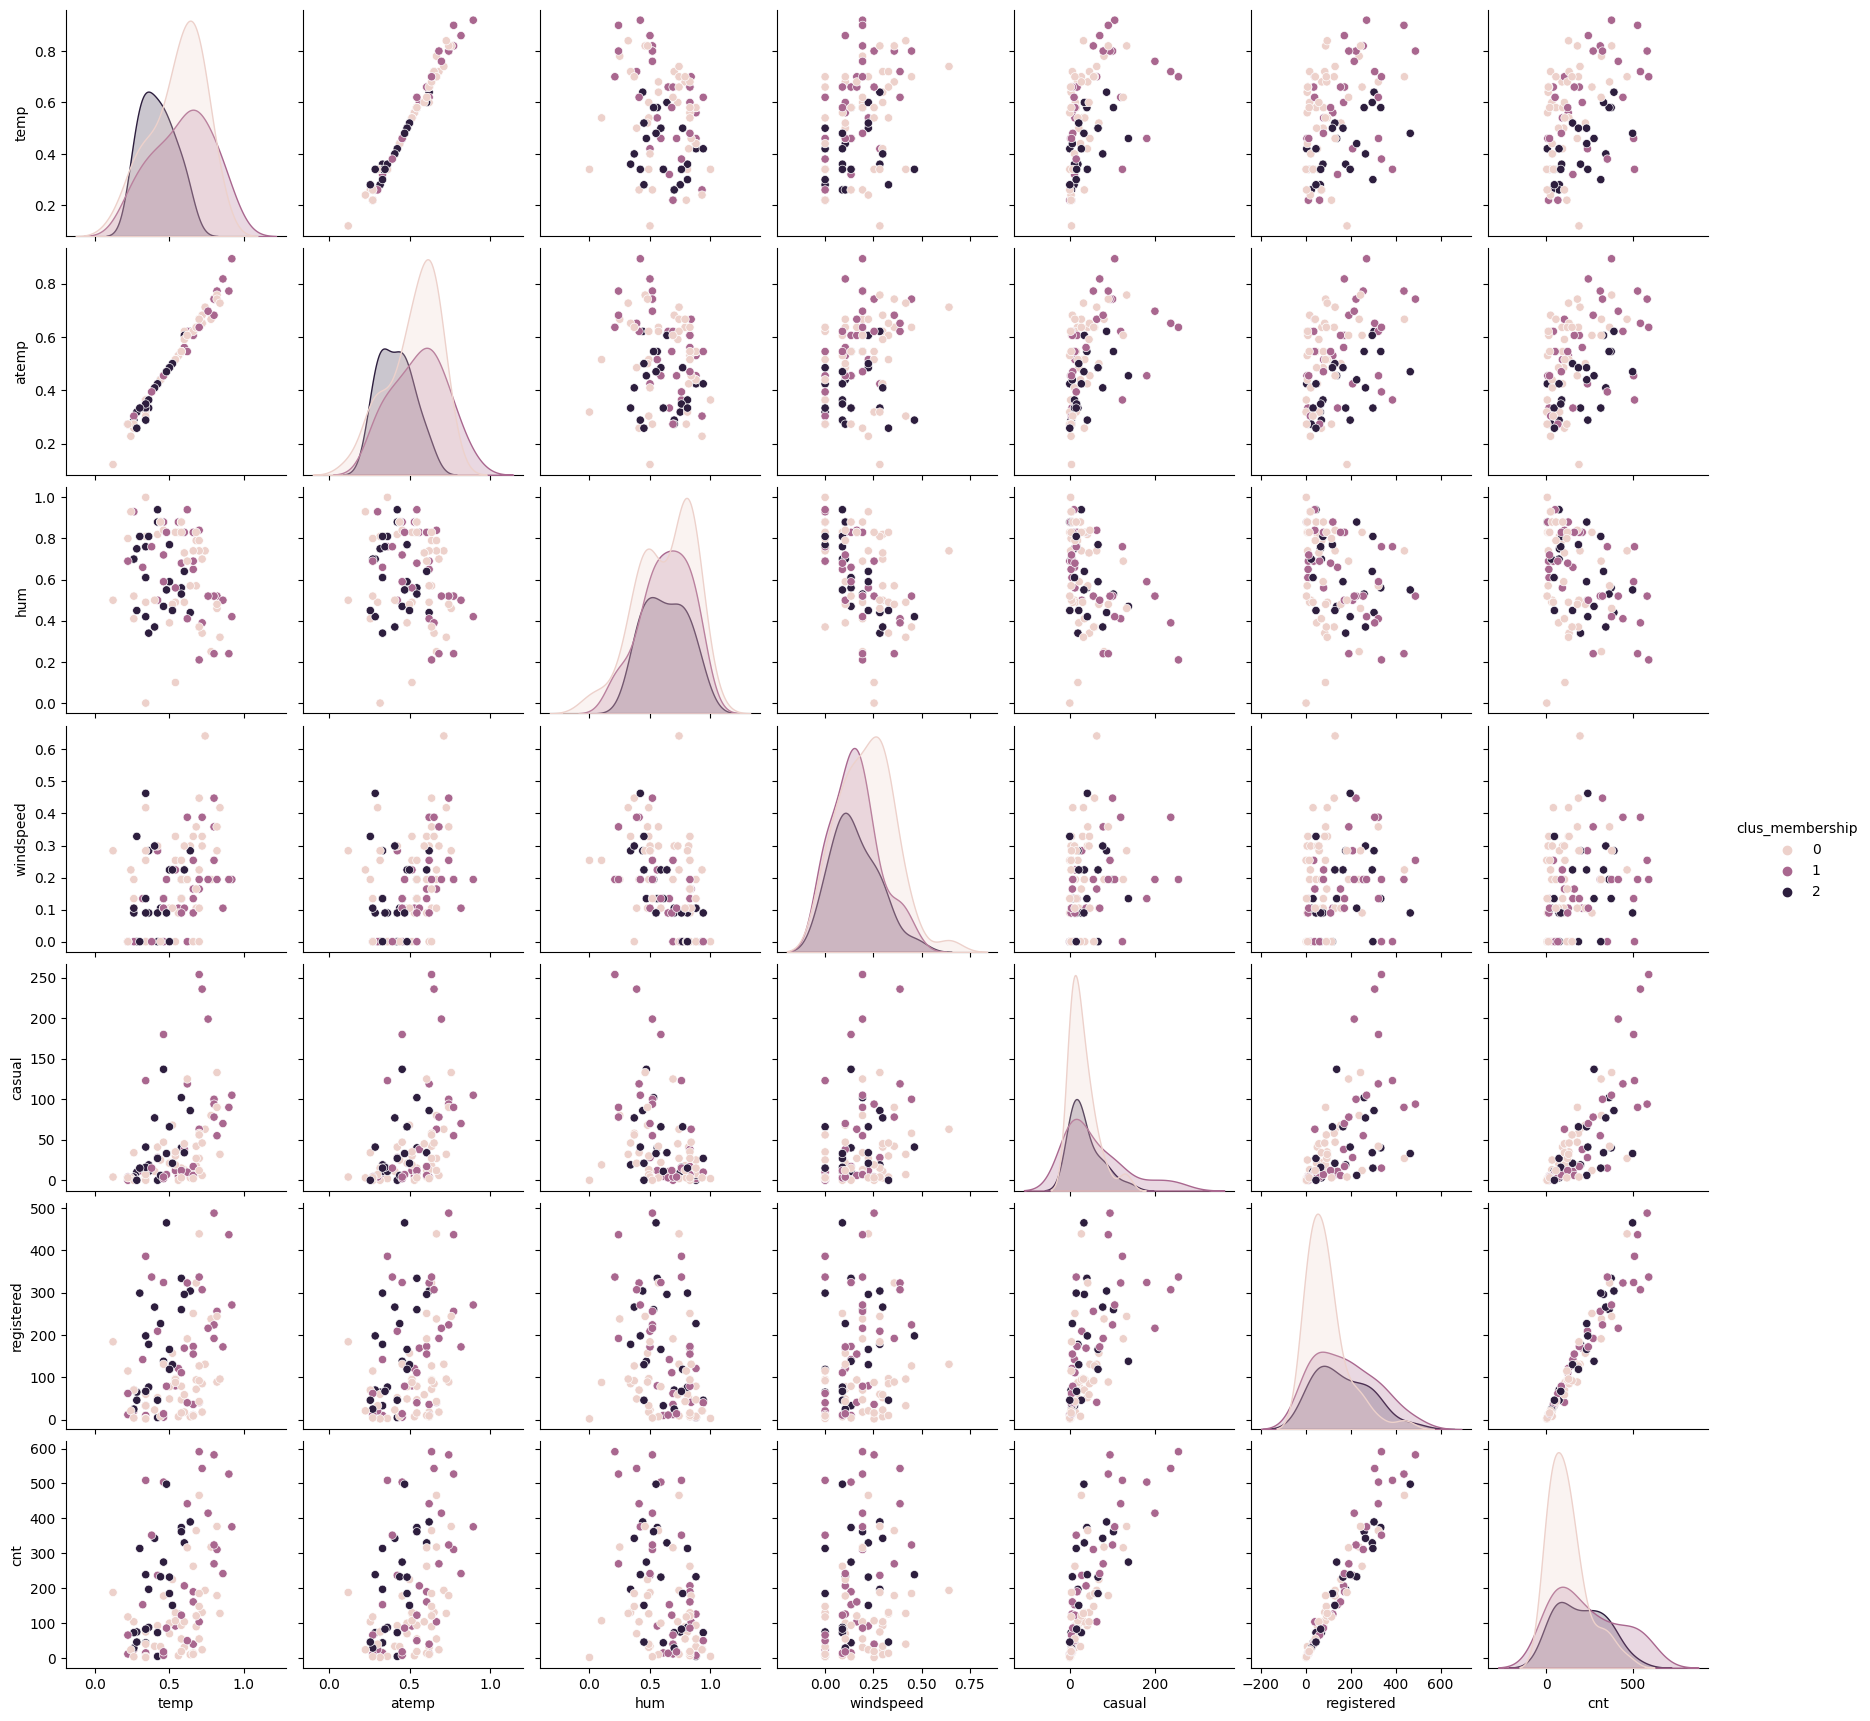

In [175]:
import seaborn as sns
g = sns.pairplot(dfs_k3, hue="clus_membership", diag_kind="kde", vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
g

In [176]:
from sklearn.cluster import KMeans

dfs_k4 = dfs3

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=10)
kmeans.fit(dfs_k4)
dfs_k4['clus_membership']=kmeans.labels_

dfs_k4

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
6557,6558,4,0,10,19,0,3,1,1,0.58,0.5455,0.56,0.1343,40,334,374,3
11737,11738,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126,1
4952,4953,3,0,7,6,0,6,0,1,0.72,0.6818,0.70,0.2985,6,18,24,3
2853,2854,2,0,5,19,0,2,1,1,0.68,0.6364,0.57,0.3582,42,323,365,0
3697,3698,2,0,6,23,0,2,1,1,0.68,0.6364,0.79,0.1045,18,72,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,7251,4,0,11,17,0,4,1,1,0.48,0.4697,0.55,0.0896,33,465,498,3
5029,5030,3,0,8,11,0,2,1,1,0.84,0.7273,0.32,0.4179,32,96,128,3
11819,11820,2,1,5,16,0,6,0,2,0.70,0.6364,0.21,0.1940,254,337,591,1
7431,7432,4,0,11,6,1,5,0,1,0.28,0.2576,0.45,0.3284,0,46,46,3


c:\Users\37062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


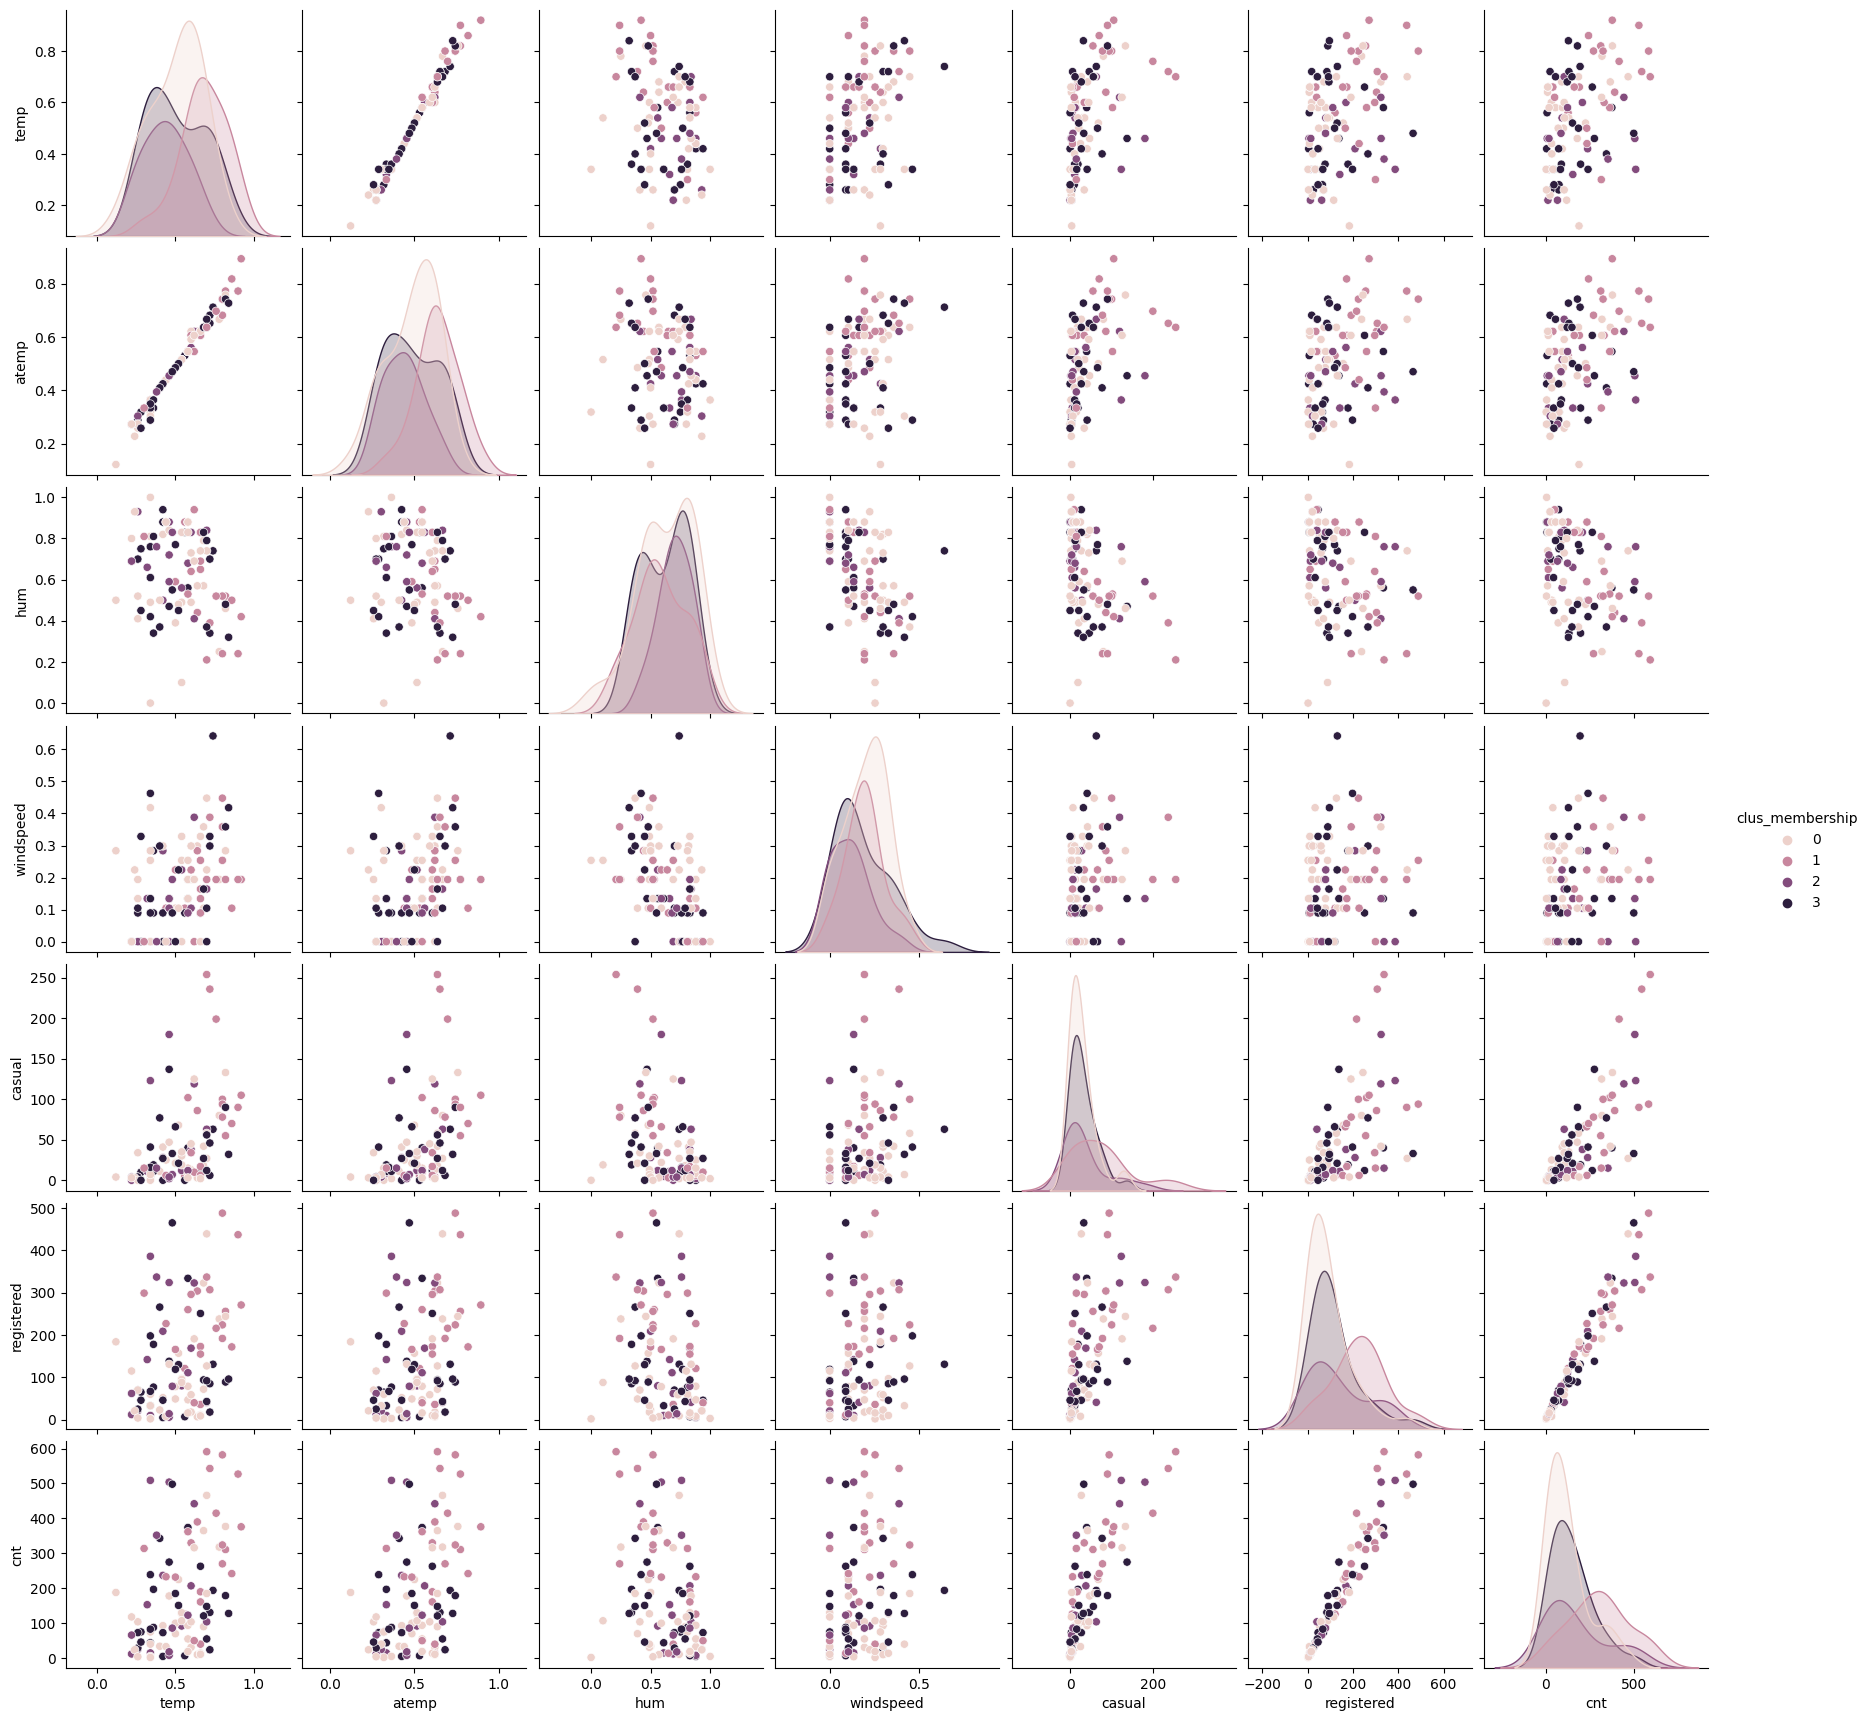

In [177]:
import seaborn as sns
g = sns.pairplot(dfs_k4, hue="clus_membership", diag_kind="kde", vars=["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
g

**Išvados:**

Klasterizavimas su k = 2

- Antrame klasteryje išskirtos grupės atrodo aiškiai pagal tokias savybes kaip "temp" (temperatūra), "atemp" (jutimo temperatūra), "hum" (drėgmė), ir "windspeed" (vėjo greitis). Šie kintamieji atskleidžia aiškius skirtumus tarp klasterių, pabrėždami, kad orų sąlygos turi įtakos grupių formavimuisi.

- Stipriai išreikšti skirtumai tarp "casual" (atsitiktiniai vartotojai) ir "registered" (registruoti vartotojai) klasteriuose parodo, kad skirtingos grupės naudoja paslaugas įvairiais orų sąlygų atvejais.

Klasterizavimas su k = 3

- Trečiame klasteryje, matome dar aiškesnę segmentaciją pagal "temp" ir "hum", o tai leidžia geriau suprasti, kaip specifinės oro sąlygos veikia vartotojų elgseną.
"casual" ir "registered" vartotojų pasiskirstymas dar labiau išsiskiria, atskleidžiant, kad skirtingi vartotojų tipai skirtingai reaguoja į orų kintamumą.

Klasterizavimas su k = 4

- Ketvirtame klasteryje, galime stebėti dar detaliau, kaip specifinės oro sąlygos, pavyzdžiui, labai aukšta ar žema temperatūra, veikia vartotojų skaičių.
Didesnis klasterių skaičius leidžia atskleisti subtilius skirtumus tarp "casual" ir "registered" vartotojų elgsenos, ypač žiūrint į tai, kaip jie reaguoja į vėjo greitį ir drėgmę.

Bendra išvada:
- Didėjant klasterių skaičiui, duomenų analizė atskleidžia vis gilesnius vartotojų elgsenos modelius, susijusius su orų sąlygomis. Tai suteikia vertingų įžvalgų, kurias galima panaudoti, planuojant paslaugas ar rengiant orų sąlygų atitinkančius pasiūlymus.
Klasterizavimas pagal oro sąlygas ir vartotojų tipus rodo, kad šie du kintamieji yra labai svarbūs nustatant vartotojų elgseną ir jų pasirinkimus. Detalus šių faktorių ištyrimas yra būtinas norint optimizuoti paslaugas ir geriau suprasti vartotojų poreikius.

### 6.	Klasterių įvertinimas

In [178]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def δ(ck, cl):
    values = np.ones([len(ck), len(cl)])
    for i in range(len(ck)):
        for j in range(len(cl)):
            values[i, j] = np.linalg.norm(ck[i] - cl[j])
    return np.min(values)

def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(len(ci)):
        for j in range(len(ci)):
            values[i, j] = np.linalg.norm(ci[i] - ci[j])
    return np.max(values)

def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(len(k_list)))
    for k in l_range:
        for l in l_range[0:k] + l_range[k+1:]:
            δs[k, l] = δ(k_list[k], k_list[l])
        Δs[k] = Δ(k_list[k])
    return np.min(δs) / np.max(Δs)

dunn_indices = []

for i in range(2, 11):  # Adjust the range as needed
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=10)
    kmeans.fit(dfs3)
    dfs3['clus_membership'] = kmeans.labels_
    k_list = []
    for j in range(i):
        k_list.append(dfs3.loc[dfs3.clus_membership == j].values)
    dunn_index = dunn(k_list)
    dunn_indices.append((i, dunn_index))
    print(f'k={i}, Dunn Index: {dunn_index}')


k=2, Dunn Index: 0.00011344015163335061
k=3, Dunn Index: 0.00017500903700787645
k=4, Dunn Index: 0.00021982055010687384
k=5, Dunn Index: 0.0002813106001820553
k=6, Dunn Index: 0.00033737934156413934
k=7, Dunn Index: 0.0004357346020194083
k=8, Dunn Index: 0.0004357346020194083
k=9, Dunn Index: 0.0004933931059977008
k=10, Dunn Index: 0.0004933931059977008


**Išvados:** Kadangi Dunno indeksas yra didžiausias, kai turime klasterizavimo skaičius  k = 9, tai vadinasi šio klasterio skaičius yra tinkamiaus

### 7. Patikrinti ar pasirinkto kintamojo reikšmės skirtinguose klasteriuose skiriasi

**Hipotezė**: Klasteriuose esančių jutimo temperatūros vidurkiai yra skirtingi

In [179]:
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=10)
kmeans.fit(dfs3)
dfs3['clus_membership'] = kmeans.labels_

clus0 = dfs3.loc[dfs3.clus_membership == 0]
clus1 = dfs3.loc[dfs3.clus_membership == 1]
clus2 = dfs3.loc[dfs3.clus_membership == 2]
clus3 = dfs3.loc[dfs3.clus_membership == 3]
clus4 = dfs3.loc[dfs3.clus_membership == 4]
clus5 = dfs3.loc[dfs3.clus_membership == 5]
clus6 = dfs3.loc[dfs3.clus_membership == 6]
clus7 = dfs3.loc[dfs3.clus_membership == 7]
clus8 = dfs3.loc[dfs3.clus_membership == 8]
clus9 = dfs3.loc[dfs3.clus_membership == 9]

clus0.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
11737,11738,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126,0
11287,11288,2,1,4,12,0,5,1,1,0.58,0.5455,0.53,0.1940,102,260,362,0
12234,12235,2,1,5,23,0,2,1,3,0.62,0.5455,0.94,0.0000,10,40,50,0
12009,12010,2,1,5,14,0,0,0,1,0.72,0.6515,0.39,0.3881,236,307,543,0
12157,12158,2,1,5,18,0,6,0,2,0.76,0.6970,0.52,0.1940,199,216,415,0


In [180]:
clus1.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
2853,2854,2,0,5,19,0,2,1,1,0.68,0.6364,0.57,0.3582,42,323,365,1
3697,3698,2,0,6,23,0,2,1,1,0.68,0.6364,0.79,0.1045,18,72,90,1
2954,2955,2,0,5,0,0,0,0,2,0.50,0.4848,0.59,0.1045,22,78,100,1
3842,3843,2,0,6,0,0,2,1,1,0.60,0.6212,0.49,0.1940,13,18,31,1
2598,2599,2,0,4,4,0,6,0,3,0.34,0.3636,1.00,0.0000,2,3,5,1


In [181]:
clus2.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
17084,17085,4,1,12,15,0,3,1,1,0.42,0.4242,0.50,0.2836,28,209,237,2
16264,16265,4,1,11,10,0,4,1,2,0.32,0.3333,0.66,0.1343,11,142,153,2
16650,16651,4,1,12,13,0,6,0,2,0.34,0.3636,0.76,0.0000,123,386,509,2
16664,16665,4,1,12,3,0,0,0,2,0.26,0.3030,0.93,0.0000,4,21,25,2
17189,17190,1,1,12,0,0,1,1,1,0.22,0.2727,0.69,0.0000,0,12,12,2


In [182]:
clus3.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
6557,6558,4,0,10,19,0,3,1,1,0.58,0.5455,0.56,0.1343,40,334,374,3
7305,7306,4,0,11,0,0,0,0,1,0.28,0.3182,0.75,0.0000,10,65,75,3
6588,6589,4,0,10,2,0,5,1,1,0.42,0.4242,0.88,0.0000,0,5,5,3
7801,7802,4,0,11,16,0,6,0,2,0.46,0.4545,0.47,0.1343,137,138,275,3
7326,7327,4,0,11,21,0,0,0,1,0.36,0.3636,0.81,0.0896,11,77,88,3


In [183]:
clus4.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
4952,4953,3,0,7,6,0,6,0,1,0.72,0.6818,0.70,0.2985,6,18,24,4
4564,4565,3,0,7,2,0,4,1,1,0.64,0.6212,0.57,0.2985,3,7,10,4
4269,4270,3,0,7,19,0,5,1,1,0.78,0.6667,0.25,0.1940,80,238,318,4
5433,5434,3,0,8,7,0,5,1,2,0.66,0.6061,0.83,0.0896,12,251,263,4
5155,5156,3,0,8,17,0,0,0,3,0.74,0.7121,0.74,0.6418,63,131,194,4


In [184]:
clus5.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
13561,13562,3,1,7,6,0,2,1,1,0.66,0.6061,0.83,0.1343,17,173,190,5
14036,14037,3,1,8,1,0,1,1,1,0.66,0.6212,0.65,0.0896,3,11,14,5
12784,12785,3,1,6,21,0,4,1,1,0.82,0.7727,0.52,0.1940,55,256,311,5
13978,13979,3,1,8,15,0,5,1,1,0.80,0.7424,0.52,0.4478,100,224,324,5
13682,13683,3,1,7,7,0,0,0,1,0.66,0.6212,0.69,0.2537,4,36,40,5


In [185]:
clus6.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
1627,1628,1,0,3,8,0,0,0,1,0.40,0.4091,0.50,0.2985,11,23,34,6
16,17,1,0,1,16,0,6,0,2,0.42,0.4242,0.82,0.2985,41,52,93,6
1552,1553,1,0,3,1,0,4,1,3,0.34,0.3182,0.00,0.2537,0,2,2,6
1863,1864,2,0,3,10,0,3,1,2,0.34,0.3182,0.81,0.2836,15,60,75,6
1783,1784,1,0,3,0,0,0,0,1,0.34,0.3030,0.49,0.4179,7,33,40,6


In [186]:
clus7.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
8756,8757,1,1,1,16,0,4,1,1,0.36,0.3333,0.34,0.2836,19,178,197,7
7927,7928,4,0,12,23,0,4,1,1,0.26,0.2879,0.70,0.0896,3,70,73,7
8496,8497,1,0,12,17,0,0,0,1,0.34,0.3333,0.61,0.1343,11,33,44,7
8825,8826,1,1,1,13,0,0,0,1,0.40,0.4091,0.37,0.2985,77,266,343,7
8525,8526,1,0,12,23,1,1,0,1,0.26,0.2727,0.70,0.1045,4,25,29,7


In [187]:
clus8.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
15922,15923,4,1,11,3,0,4,1,1,0.34,0.3333,0.61,0.1343,5,10,15,8
15165,15166,4,1,9,2,0,6,0,2,0.54,0.5152,0.56,0.2239,12,80,92,8
15428,15429,4,1,10,1,0,3,1,2,0.46,0.4545,0.88,0.0000,2,6,8,8
14837,14838,3,1,9,10,0,6,0,1,0.62,0.6212,0.41,0.3881,119,323,442,8
14827,14828,3,1,9,0,0,6,0,1,0.60,0.5606,0.83,0.1045,38,169,207,8


In [188]:
clus9.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clus_membership
10908,10909,2,1,4,16,0,3,1,2,0.64,0.6212,0.44,0.2836,86,304,390,9
9954,9955,1,1,2,19,0,5,1,2,0.44,0.4394,0.88,0.1045,6,227,233,9
10841,10842,2,1,4,20,0,0,0,2,0.50,0.4848,0.59,0.2239,66,166,232,9
10529,10530,1,1,3,20,0,1,1,1,0.60,0.6061,0.64,0.2239,34,296,330,9
10111,10112,1,1,3,9,0,5,1,1,0.30,0.3333,0.81,0.0000,15,299,314,9


In [189]:
import numpy as np
from scipy import stats

data =[ ]
for i in range(0, 3):
    data.append(dfs3.loc[dfs3.clus_membership == i]["atemp"])
    a = stats.shapiro(dfs3.loc[dfs3.clus_membership == i]["atemp"])
    print(a[1])

0.22268109023571014
0.25829771161079407
0.5689669847488403


**Išvada:** Kadangi pvalue > 0,05, tai pagal Shapiro testą, kintamasis tenkina normalumo sąlygą.

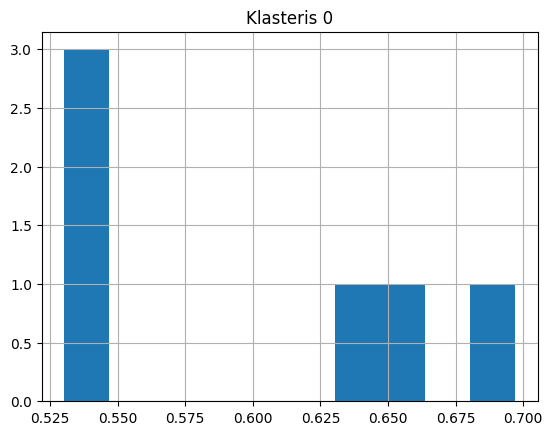

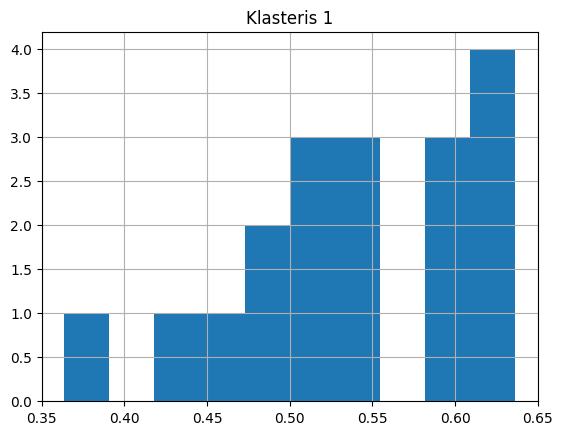

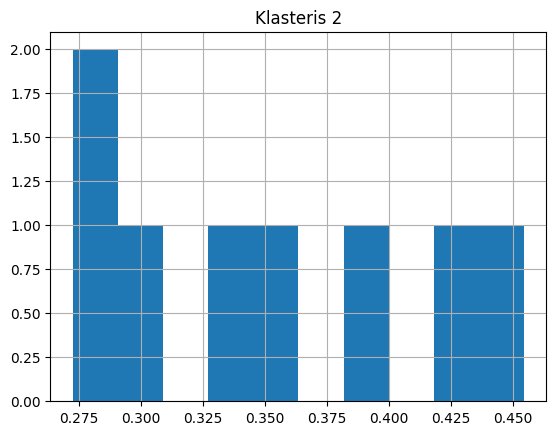

In [190]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.hist(dfs3.loc[dfs3.clus_membership == i]["atemp"])
    plt.grid(True)
    plt.title(f'Klasteris {i}')
    plt.show()


In [191]:
import numpy as np
import scipy.stats


for i in range(3):
    print(f' Imčių dispersija ({i} klasterio): {np.var(dfs3.loc[dfs3.clus_membership == i]["atemp"], ddof=1)}')

 Imčių dispersija (0 klasterio): 0.004835678666666664
 Imčių dispersija (1 klasterio): 0.006080053235294116
 Imčių dispersija (2 klasterio): 0.004705211250000001


Išvada: Kadangi imčių dispersijos nėra labai didelės vadinasi imčių reikšmės išsidėstę normaliai.

In [192]:
0.004835678666666664/0.006080053235294116

0.7953349221674608

In [193]:
a = dfs3.loc[dfs3.clus_membership == 0]["atemp"]
b = dfs3.loc[dfs3.clus_membership == 1]["atemp"]
c = dfs3.loc[dfs3.clus_membership == 2]["atemp"]


def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value

# perform F-test
f_test(a, b)

(0.7953349221674608, 0.5678154417191017)

**Išvada:** Kadangi pvalue > 0,05, tai pagal Fišerio testą, kintamųjų dispersijos lygios.

In [194]:
import numpy as np
from scipy import stats
# Perform the two sample t-test with equal variances
t_stat, p_value = stats.ttest_ind(a, b, equal_var=True)
print("T statistic:", t_stat)
print("P-value:", p_value)

T statistic: 1.688836615479387
P-value: 0.10537614032801332


**Išvada:** Kadangi pvalue > 0,05, tai pagal Stjudento testą, kintamųjų vidurkiai lygūs.

**Išvada:** Klasteriuose esančių jutimo temperatūros vidurkiai yra skirtingi

**Bendros išvados:**

- Pasirinkę duomenis juos nuskaitėme ir išanalizavome.
- Iš duomenų gavome 1 kategorinį ir 16 kiekybinių kintamųjų.
- Iš histogramos ir boxplot grafikų padarėme šias išvadas:

  - Drėgmės histogramos vertės pasiskirsčiusios link vidurkio, su didžiausia tankme aplink 0.6-0.8. Drėgmės pasiskirstymas ištemptas į dešinę, kur yra vertės artėja prie 1.
  - Temperatūros histogramos pasiskirstymas atrodo truputį mažiau simetriškas nei drėgmės, su dažniausiomis reikšmėmis 0.2-0.4 ir 0.6-0.8. Taip pat matoma, kad temperatūra turi platų pasiskirstymą, bet su aiškiais pikais.
  - Drėgmės(boxplot) grafike matome, kad yra nuokryptis (beveik 0.1). Šioje vietoje drėgmė buvo žymiai mažesnė lyginant su duomenų rinkiniu.
  - Temperatūros (boxplot) grafike nesimato jokių nukrypimų, o tai rodo vienodesnį duomenų rinkinį (temperatūros atžvilgiu).

- Sudarius dendogramas 5 klasterizavimo jungimo metodais gauti klasteriai, kuriuose atsispindi dviračių nuomos rezultatai pagal naujų vartotojų skaičių, atsitiktinių vartotojų skaičių, oro sąlygas bei metų laiką.

- Atlikus neherachinį klasterizavimą gavome šias išvadas:

  - Didėjant klasterių skaičiui, duomenų analizė atskleidžia vis gilesnius vartotojų elgsenos modelius, susijusius su orų sąlygomis. Tai suteikia vertingų įžvalgų, kurias galima panaudoti, planuojant paslaugas ar rengiant orų sąlygų atitinkančius pasiūlymus.
  - Klasterizavimas pagal oro sąlygas ir vartotojų tipus rodo, kad šie du kintamieji yra labai svarbūs nustatant vartotojų elgseną ir jų pasirinkimus. Detalus šių faktorių ištyrimas yra būtinas norint optimizuoti paslaugas ir geriau suprasti vartotojų poreikius.

- Dunn indeksas didžiausias, kai klasterizavimo skaičius 9, vadinasi tinkamiausias klasterių skaičius yra 9.

- Išsikėlus hipotezę, kad klasteriuose esančių jutimo temperatūros vidurkiai yra skirtingi buvo patvirtina dėl šių priežasčių:

  1. a, b ir c klasterių pvalue > 0,05, tai pagal Shapiro testą, kintamieji tenkina normalumo sąlygą.
  2. Imčių dispersijos nėra labai didelės, galima laikyti, kad imčių reikšmės išsidėstę normaliai.
  3. pvalue > 0,05, tai pagal Fišerio testą, kintamųjų dispersijos lygios.
  4. pvalue > 0,05, tai pagal Stjudento testą, kintamųjų vidurkiai lygūs.